In [1]:
#Import Libraries
#For Convert data to dataframe
import pandas as pd
#for handling arrays
import numpy as np
#for Graphs and plots
import seaborn as sns
import matplotlib.pyplot as plt
#For converting Categorical values to numerical
from sklearn.preprocessing import LabelEncoder
#for Feature Scaling
from sklearn.preprocessing import StandardScaler
#for splitting the input data as train and test
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


In [2]:
#Data Import
pro=pd.read_csv("crop_production.csv")
pro

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [5]:
#To know the size of the data
pro.shape

(246091, 7)

In [7]:
#To see the features or Columnsof the data
pro.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [9]:
#divide data  into dependent and independent features and convert to arrays
x=pro.iloc[:,:-1]
y=pro.iloc[:,6]

In [11]:
#Check for null values
pro.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [13]:
pro.replace("",np.nan,inplace=True)
new=pro[(pro.Production.isnull())].reset_index()
new

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
1,51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
2,623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
3,630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
4,698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...,...
3725,244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
3726,244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
3727,245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
3728,245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [15]:
array_new=new.iloc[:,:].values
array_prod=pro.iloc[:,:].values


In [17]:
# Perform groupby and mean calculation
meandf = pro.groupby(['State_Name', 'Crop'], as_index=False)['Production'].mean()

# Display result
meandf

,State_Name,Crop,Production
0,Andaman and Nicobar Islands,Arecanut,2825.635882
1,Andaman and Nicobar Islands,Arhar/Tur,52.000000
2,Andaman and Nicobar Islands,Banana,6089.040625
3,Andaman and Nicobar Islands,Black pepper,51.750000
4,Andaman and Nicobar Islands,Cashewnut,93.599444
...,...,...,...
1255,West Bengal,Sunflower,684.975845
1256,West Bengal,Tobacco,3168.475610
1257,West Bengal,Turmeric,1411.819444
1258,West Bengal,Urad,1524.858871


In [19]:
for i in range(len(new)):
    s=array_new[i,1]
    c=array_new[i,5]
    array_new[i,7]=meandf[(meandf.State_Name==s)&(meandf.Crop==c)].iloc[:,:-1].values[0]

In [20]:
df=pd.DataFrame(data=array_new)
df

,0,1,2,3,4,5,6,7
0,46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,"[Andaman and Nicobar Islands, Arecanut]"
1,51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.0,"[Andaman and Nicobar Islands, Dry chillies]"
2,623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.0,"[Andhra Pradesh, Moong(Green Gram)]"
3,630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.0,"[Andhra Pradesh, Horse-gram]"
4,698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.0,"[Andhra Pradesh, Rapeseed &Mustard]"
...,...,...,...,...,...,...,...,...
3725,244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.0,"[West Bengal, Peas & beans (Pulses)]"
3726,244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.0,"[West Bengal, Moong(Green Gram)]"
3727,245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.0,"[West Bengal, Rapeseed &Mustard]"
3728,245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.0,"[West Bengal, Rapeseed &Mustard]"


In [21]:
pro

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [25]:
#Now we take the nan values and replace them with the mean of production of the crop and state 
for i in range(len(array_new)):
    index=array_new[i,0]
    array_prod[index,-1]=array_new[i,7]
a=pro.columns.values
a

array(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area', 'Production'], dtype=object)

In [26]:
#Search for duplicate values
dup=pro[pro.duplicated(subset=None,keep=False)]
dup
#No duplicates

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [29]:
# Define proper column names
columns = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production']

# Ensure array_prod is converted into a DataFrame with correct column names
pro = pd.DataFrame(data=array_prod, columns=columns)

# Convert all possible numeric columns to proper numeric types
numeric_cols = ['Crop_Year', 'Area', 'Production']
for col in numeric_cols:
    pro[col] = pd.to_numeric(pro[col], errors='coerce')  # Convert non-numeric values to NaN

# Replace NaN in 'Production' column with the mean per 'State_Name' and 'Crop'
pro['Production'] = pro.groupby(['State_Name', 'Crop'])['Production'].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining NaN values with 0
pro.fillna(0, inplace=True)

# Print DataFrame info to check all columns
print(pro.info())

# Show first few rows to confirm structure
print(pro.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  

In [30]:
#Statistics and EDA
display(pro.describe())

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460910e+05
mean,2005.643018,1.200282e+04,5.743379e+05
std,4.952164,5.052340e+04,1.693662e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.210000e+02
75%,2010.000000,4.392000e+03,6.999015e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [33]:
categorical=list(pro.select_dtypes(include=['object']).columns.values)
categorical

['State_Name', 'District_Name', 'Season', 'Crop']

In [35]:
#Encode Categorical
le=LabelEncoder()
for i in range(0,len(categorical)):
    pro[categorical[i]]=le.fit_transform(pro[categorical[i]])
pro

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0
...,...,...,...,...,...,...,...
246086,32,471,2014,3,95,306.0,801.0
246087,32,471,2014,3,102,627.0,463.0
246088,32,471,2014,4,106,324.0,16250.0
246089,32,471,2014,5,95,279151.0,597899.0


In [37]:
# Step 2: Summary Statistics
numeric_pro= pro.select_dtypes(include=['number'])  # Select only numeric columns

print("Mean of numeric columns:\n", numeric_pro.mean())
print("\nMedian of numeric columns:\n", numeric_pro.median())
print("\nMode of numeric columns:\n", numeric_pro.mode().iloc[0])

print("\nVariance of columns:\n", numeric_pro.var())
print("\nStandard Deviation of columns:\n", numeric_pro.std())


Mean of numeric columns:
 State_Name           17.352053
District_Name       311.502460
Crop_Year          2005.643018
Season                2.169758
Crop                 68.432494
Area              12002.820864
Production       574337.893724
dtype: float64

Median of numeric columns:
 State_Name         16.0
District_Name     303.0
Crop_Year        2006.0
Season              2.0
Crop               65.0
Area              582.0
Production        721.0
dtype: float64

Mode of numeric columns:
 State_Name         30.0
District_Name      88.0
Crop_Year        2003.0
Season              1.0
Crop               95.0
Area                1.0
Production          1.0
Name: 0, dtype: float64

Variance of columns:
 State_Name       9.812208e+01
District_Name    3.504725e+04
Crop_Year        2.452393e+01
Season           1.654834e+00
Crop             1.160628e+03
Area             2.552614e+09
Production       2.868491e+14
dtype: float64

Standard Deviation of columns:
 State_Name       9.905659e+00


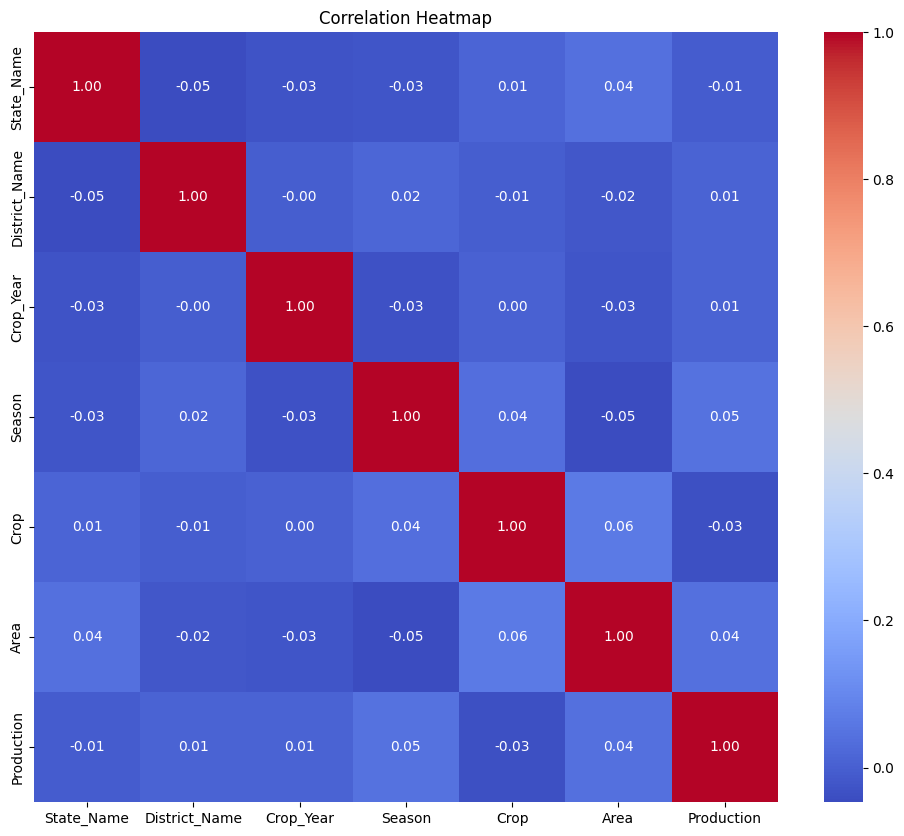

In [39]:
# Create a copy of the data to preserve the original
encoded_data = pro.copy()

# Identify categorical columns
categorical_cols = encoded_data.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col].astype(str))

# Step 7: Correlation Analysis
correlation_matrix = encoded_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [41]:
# Select only numeric columns for outlier detection
numeric_data = pro.select_dtypes(include=['number'])

# Step 5: Outlier Detection using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
filtered_data = numeric_data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# If you want to keep the non-numeric columns as well:
data_cleaned = pro.loc[filtered_data.index]
data_cleaned

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0
...,...,...,...,...,...,...,...
246085,32,471,2014,3,59,325.0,2039.0
246086,32,471,2014,3,95,306.0,801.0
246087,32,471,2014,3,102,627.0,463.0
246088,32,471,2014,4,106,324.0,16250.0


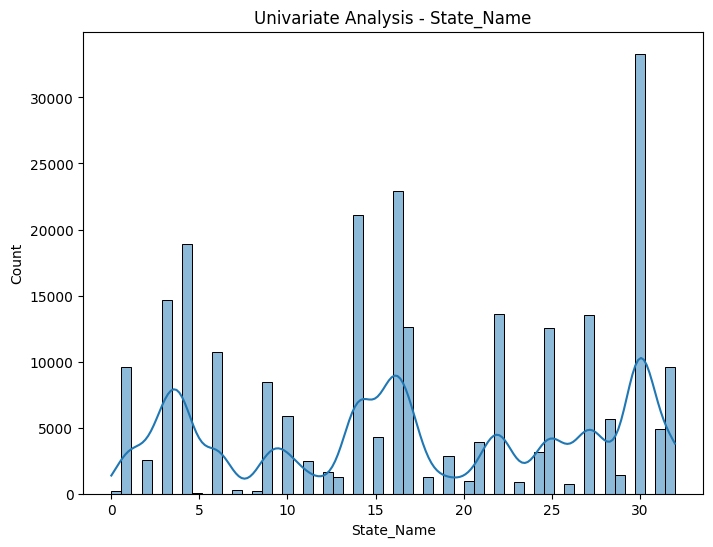

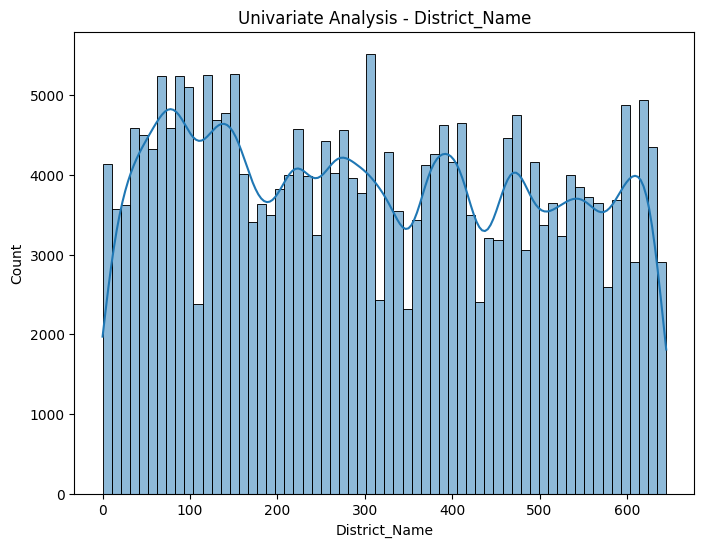

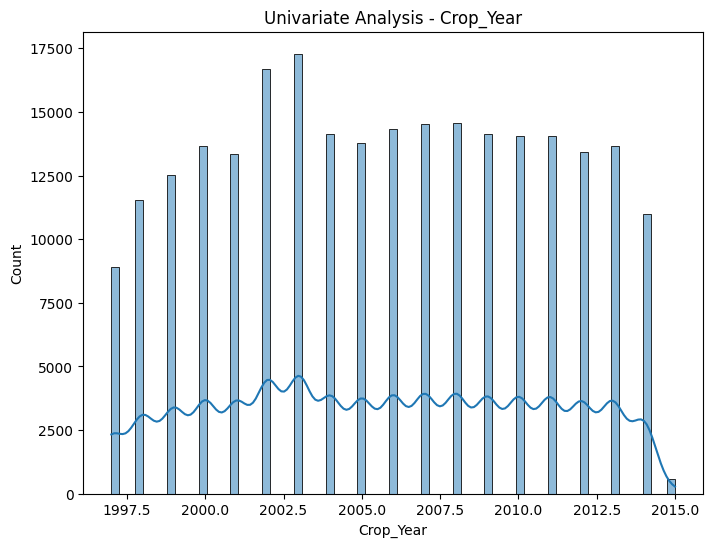

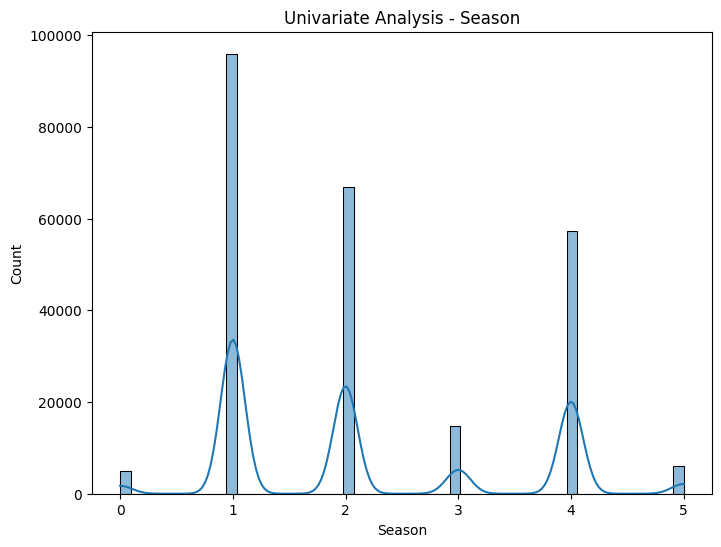

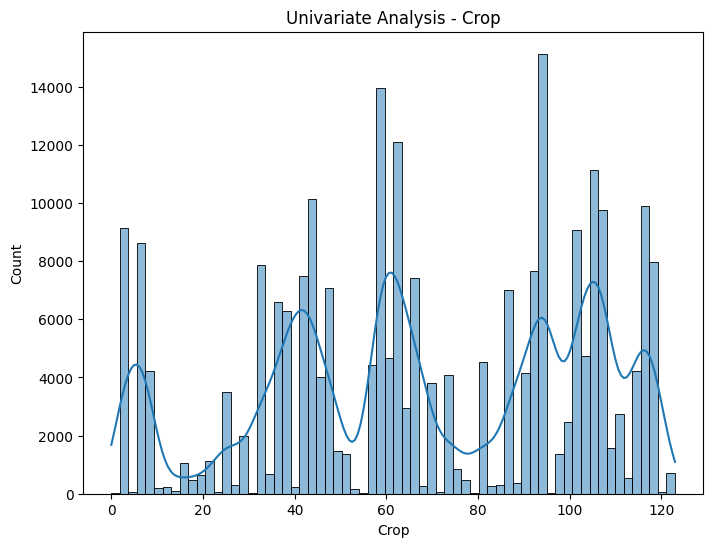

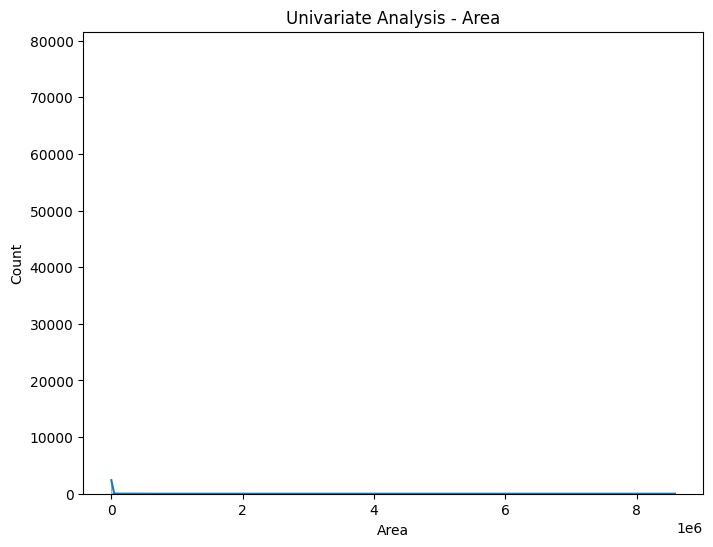

In [ ]:

# Step 9: Univariate Analysis
for col in pro.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(pro[col], kde=True)
    plt.title(f"Univariate Analysis - {col}")
    plt.show()




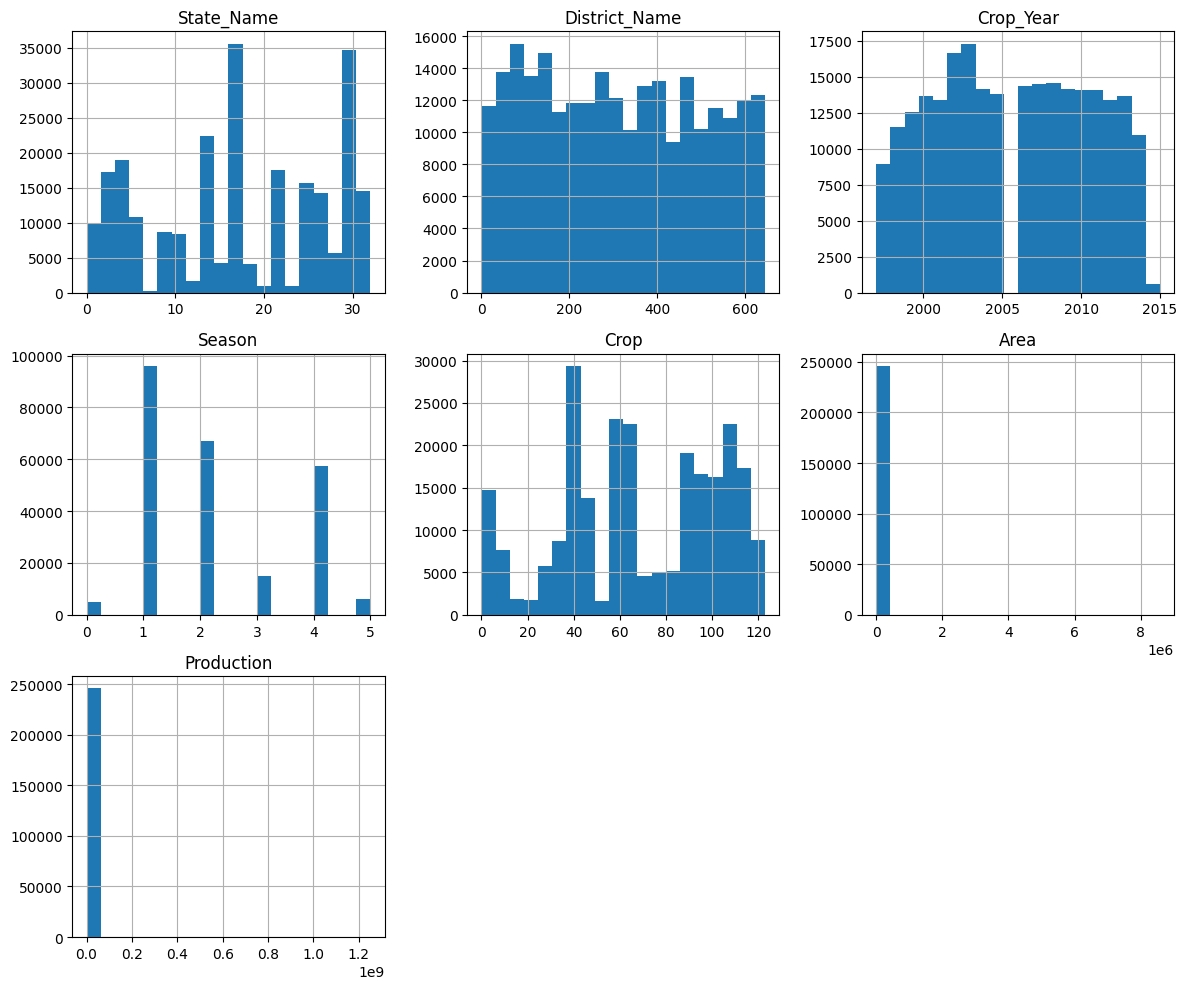

In [43]:

### Univariate Analysis
# Histograms for numerical features
pro.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


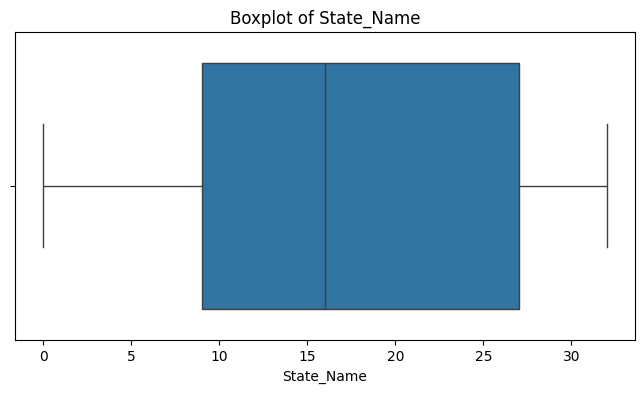

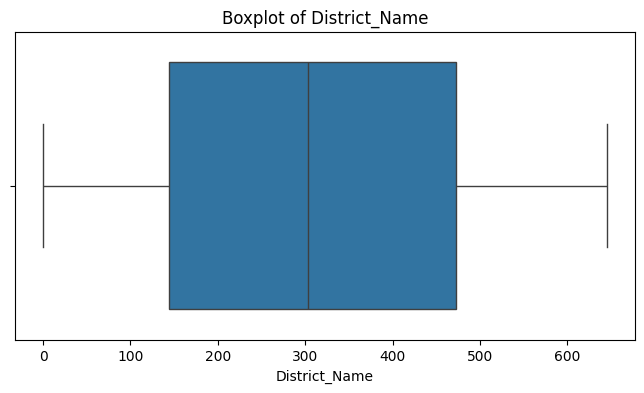

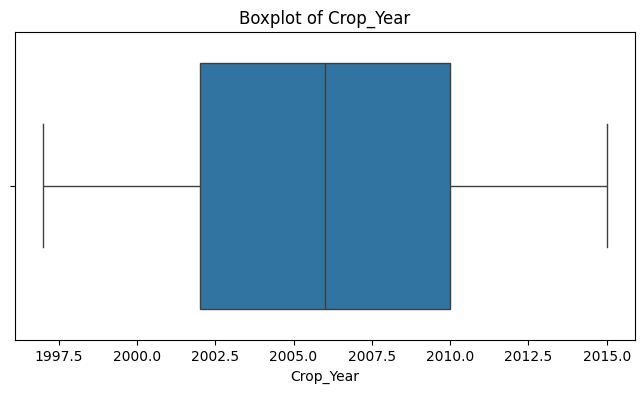

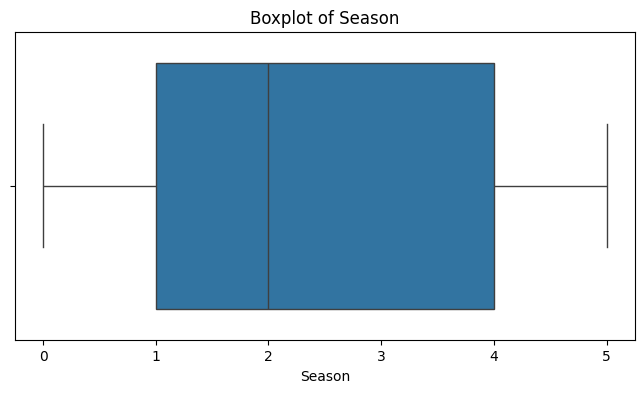

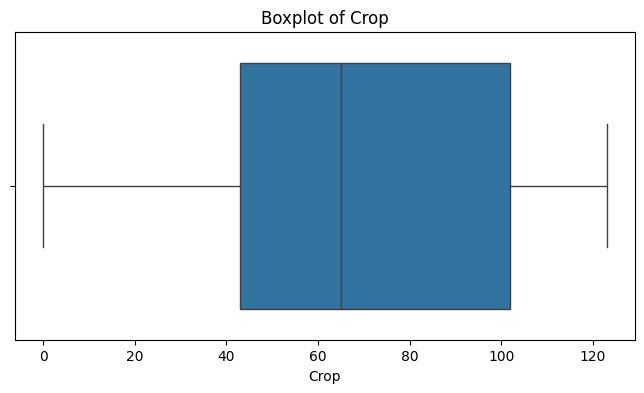

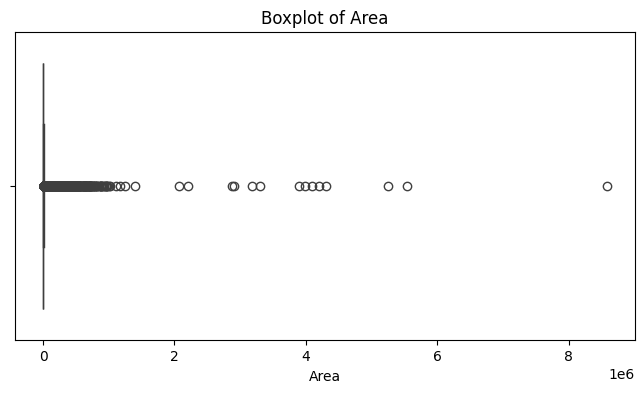

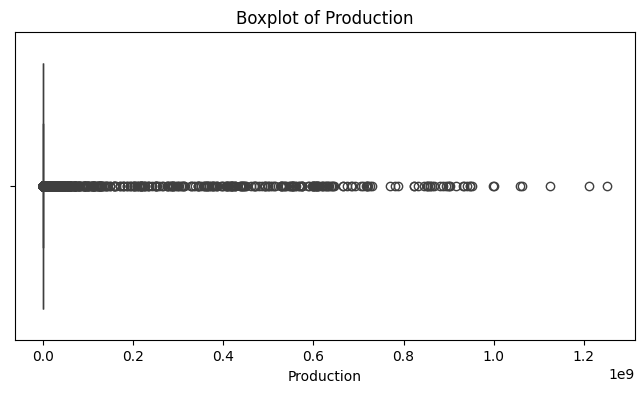

In [45]:

# Boxplots for numerical features to detect outliers
for col in pro.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=pro[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


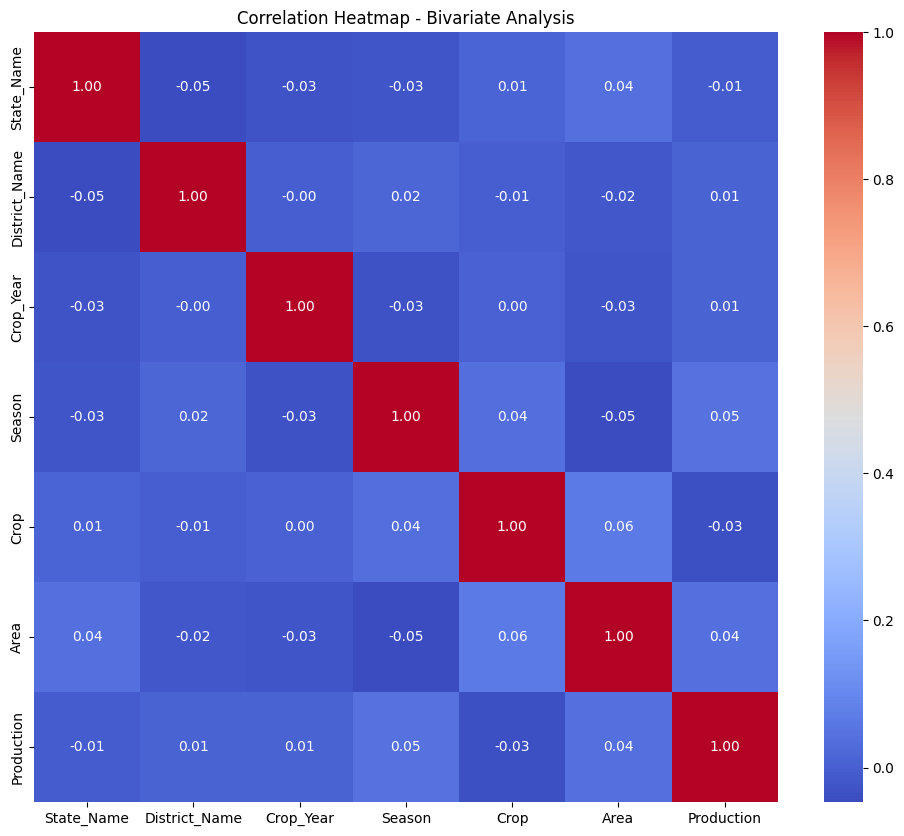

In [47]:

# Correlation Heatmap (already done, but added here for Bivariate context)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Bivariate Analysis")
plt.show()


In [ ]:

# Multivariate Analysis
sns.pairplot(pro)
plt.show()


In [49]:
# Scale the features (important for Linear and Ridge Regression)
scaler = StandardScaler()
pros_scaled = scaler.fit_transform(pro)
pros_scaled = pd.DataFrame(pros_scaled, columns=pro.columns)  # Restore column names


In [51]:
pros_scaled

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,-1.751735,0.616945,-1.139508,-0.909326,-1.950001,-0.212750,-0.033793
1,-1.751735,0.616945,-1.139508,-0.909326,0.163424,-0.237530,-0.033911
2,-1.751735,0.616945,-1.139508,-0.909326,0.779839,-0.235551,-0.033892
3,-1.751735,0.616945,-1.139508,1.422761,-1.803236,-0.234086,-0.033873
4,-1.751735,0.616945,-1.139508,1.422761,-1.362939,-0.223319,-0.033901
...,...,...,...,...,...,...,...
246086,1.478748,0.851977,1.687545,0.645399,0.779839,-0.231513,-0.033864
246087,1.478748,0.851977,1.687545,0.645399,0.985311,-0.225160,-0.033884
246088,1.478748,0.851977,1.687545,1.422761,1.102724,-0.231157,-0.032952
246089,1.478748,0.851977,1.687545,2.200124,0.779839,5.287623,0.001391


In [53]:
X = pros_scaled.drop('Production', axis=1)  # Drop target column
y = pros_scaled['Production']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)

# Evaluation
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression Mean Squared Error: {mse_lin}")
print(f"Linear Regression R-squared: {r2_lin}")

Linear Regression Mean Squared Error: 0.5548000515264164
Linear Regression R-squared: 0.0026531107564247147


In [57]:
# Ridge Regression Model (L2 Regularization)
ridge_reg = Ridge(alpha=1.0)  # Try different values of alpha (0.1, 1, 10)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [59]:

print(f"Ridge Regression Mean Squared Error: {mse_ridge}")
print(f" Ridge Regression R-squared: {r2_ridge}")

Ridge Regression Mean Squared Error: 0.5548000227602051
 Ridge Regression R-squared: 0.002653162468552961


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train RandomForest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
mse_rf, r2_rf = mean_squared_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf)

print(f"MSE: {mse_rf}, R2: {r2_rf}")


MSE: 0.10188585719654399, R2: 0.8168429464753755
